#### Analyse de série temporelle avec Python

In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Dans cet tutoriel, nous nous intéressons au cours de l'action ford sur le marché US. Pour ce faire, nous utiliserons la fonction **DataReader** de pandas.

In [2]:
#### Création d'un data frame avec les valeur de l'action Ford de 2012 à 2019
ford = web.DataReader('F', data_source= "yahoo", start = "3/14/2012", end = "3/21/2020" )

On obtient un dataframe de 6 colonnes pour chaque date de cotation (Index).
* **Open** le prix d'ouverture
* **High** le prix le plus haut
* **Low** le prix le plus bas 
* **Close** le prix de clôture de l'action
* **Adj Close** le prix ajusté de clôture (cf ouverture de capital)
* **Volume** qui correspond au nombre d'actions échangé le jour

In [3]:
ford.head(5)
ford.tail(5) ### 5 dernière valeurs du cours

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-16,5.22,5.00,5.04,5.01,110310900.0,5.01
2020-03-17,5.14,4.70,5.08,5.01,104233500.0,5.01
2020-03-18,4.84,4.10,4.75,4.50,125954700.0,4.50
2020-03-19,4.58,4.10,4.33,4.47,126603800.0,4.47
2020-03-20,4.75,4.25,4.54,4.33,129378600.0,4.33


In [4]:
ford.shape

(2018, 6)

In [5]:
##### Moyenne sur les 100 dernières valeurs pour avoir un ordre d'idée du prix de l'action

import numpy as np 

len(ford.iloc[1918:2018,:]) #### 100 dernières valeurs

np.mean(ford.iloc[1918:2018, :])

High         8.474300e+00
Low          8.284000e+00
Open         8.398300e+00
Close        8.372600e+00
Volume       5.847009e+07
Adj Close    8.276881e+00
dtype: float64

En moyenne sur les 100 dernières valeurs, l'action ford vaut **8.70** dollars.

On crée une nouvelle variable qui correspond aux rangs de l'action dans notre data frame de la plus ancienne à la plus récente. On l'appelera "**Num**".

In [6]:
ford["Num"] = range(1, len(ford) +1) ##### Incrémente la valeur suivant son rang dans le dataset

In [7]:
ford.tail()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2020-03-16,5.22,5.00,5.04,5.01,110310900.0,5.01,2014
2020-03-17,5.14,4.70,5.08,5.01,104233500.0,5.01,2015
2020-03-18,4.84,4.10,4.75,4.50,125954700.0,4.50,2016
2020-03-19,4.58,4.10,4.33,4.47,126603800.0,4.47,2017
2020-03-20,4.75,4.25,4.54,4.33,129378600.0,4.33,2018


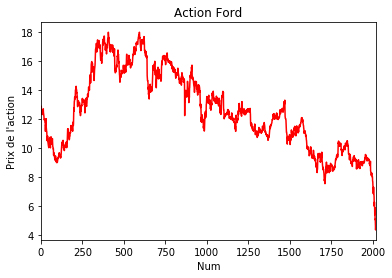

In [8]:
#### On trace le prix de l'action en fonction du temps

def graph(x,y,data):
    
    """
        Graphique une variable en fonction de l'autre
            Entrée: Nom colonne 1 (x), nom colonne 2 (y) et données (data)
            
            Sortie: Graphique
    """

    graph = data.plot("Num", "Open", legend = False, title = "Action Ford", color = (1,0,0));
    graph.legend = None
    graph.set_ylabel('Prix de l\'action')
    

graph("Num", "Open", ford)

Dans cette partie, on ne sélectionnera qu'un dixième et un vingtième des données:

**10 %** des données:

In [9]:
un_dixieme = ford.sample(frac = .1, random_state = np.random.randint(10))

In [10]:
#### De la même façon avec 5% des données

un_vingtieme = ford.sample(frac = .05, random_state = np.random.randint(10))

In [11]:
un_dixieme.head()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2015-02-05,16.02,15.75,16.01,15.85,25713200.0,12.149373,729
2012-08-08,9.38,9.24,9.25,9.35,22630300.0,6.662503,103
2019-07-10,10.26,10.11,10.19,10.11,29082200.0,9.636596,1842
2016-11-30,12.14,11.92,11.97,11.96,47646200.0,9.893886,1188
2019-06-07,9.82,9.70,9.76,9.76,18848700.0,9.302985,1820


PB: Valeur ne sont pas dans l'ordre

In [12]:
un_dixieme.head()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2015-02-05,16.02,15.75,16.01,15.85,25713200.0,12.149373,729
2012-08-08,9.38,9.24,9.25,9.35,22630300.0,6.662503,103
2019-07-10,10.26,10.11,10.19,10.11,29082200.0,9.636596,1842
2016-11-30,12.14,11.92,11.97,11.96,47646200.0,9.893886,1188
2019-06-07,9.82,9.70,9.76,9.76,18848700.0,9.302985,1820


In [13]:
#### On enleve l'index de ce data frame

un_dixieme.index.name = None
un_dixieme.head()####Plus le nom de l'index Date

un_vingtieme.index.name = None

In [14]:
#### On tri les valeurs par Num

un_dixieme = un_dixieme.sort_values(by = ["Num"], ascending = [True])
un_dixieme[["Open", "Close", "Num"]]#### Double crôchet
un_vingtieme = un_vingtieme.sort_values(by = ["Num"], ascending = [True])

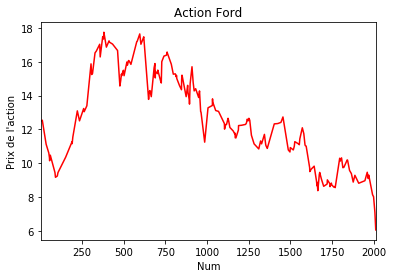

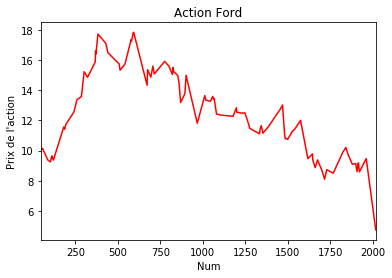

In [15]:
#### On trace le graphique original par rapport à l'echantillon de données

#### Un dixième
graph("Num", "Open", un_dixieme)

#### Un vingtième
graph("Num", "Open", un_vingtieme)


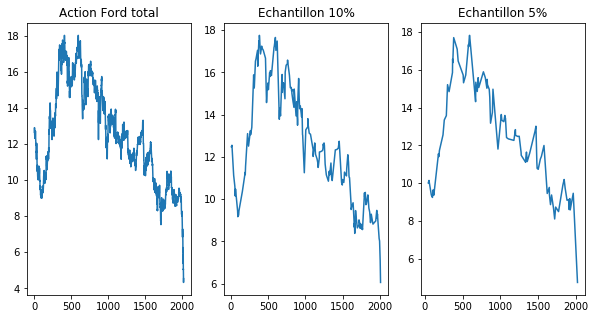

In [16]:
#### On affiche les deux graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes


def trois_graph(x, y):
    
    """
        Fonction qui retourne trois graphiques (Action ford, 10% des valeurs aléatoires et 5% des valeurs)
        
        Entrée: Nom de colonne x et y
        
        Sortie: Trois graphiques
    
    """
    #### Une ligne et trois tableaux 
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
    #### Affichage premier tableau 
    axes[0].plot(x, y, data = ford)
    axes[0].set_title("Action Ford total")
    
    #### Affichage second tableau 10%
    axes[1].plot(x, y, data = un_dixieme)
    axes[1].set_title("Echantillon 10%")
    
    #### Affichage troisième tableau 5%
    axes[2].plot(x, y, data = un_vingtieme)
    axes[2].set_title("Echantillon 5%")


trois_graph("Num", "Open" ) #### Appel de la fonction

In [17]:
#### Modification de l'index pour que ce soit la variable "Num"

ford = ford.reset_index()
ford.head(3)

# ford.index = ford["Num"]
# ford

,Date,High,Low,Open,Close,Volume,Adj Close,Num
0,2012-03-14,12.90,12.63,12.64,12.88,47578500.0,9.088853,1
1,2012-03-15,13.04,12.83,12.90,12.90,55286600.0,9.102968,2
2,2012-03-16,12.90,12.51,12.86,12.51,77119600.0,8.827763,3


On génère une moyenne mobile avec une fenètre de 80 cotations. On place les résultats dans la colonne "**Moyenne mobile**".

In [18]:
#### Moyenne mobile 

#### Moyenne mobile à fenètre de 80
ford["Moyenne_Mobile"] = ford["Open"].rolling(window =80, min_periods=1).mean()

ford[["Open", "Moyenne_Mobile"]].tail(5) #### 5 dernières colonnes de notre dataset

#ford

,Open,Moyenne_Mobile
2013,5.04,8.491250
2014,5.08,8.442375
2015,4.75,8.390750
2016,4.33,8.335250
2017,4.54,8.282000


Text(0.5,1,'Moyenne Mobile à 80 cotations')

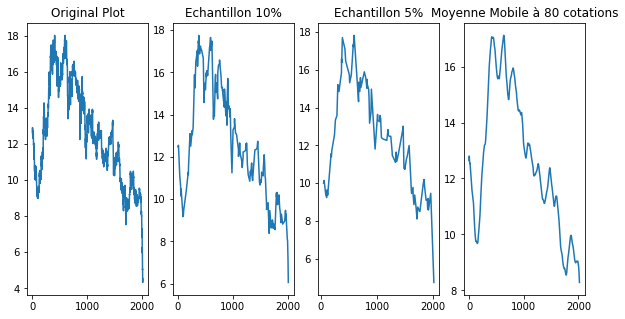

In [19]:
#### On affiche les 4 graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,5))

axes[0].plot("Num", "Open", data = ford)
axes[0].set_title("Original Plot")
axes[1].plot("Num", "Open", data = un_dixieme)
axes[1].set_title("Echantillon 10%")
axes[2].plot("Num", "Open", data = un_vingtieme)
axes[2].set_title("Echantillon 5%")
axes[3].plot("Num", "Moyenne_Mobile", data = ford)
axes[3].set_title("Moyenne Mobile à 80 cotations")

La moyenne mobile semble bien fitter les graphiques précedents. Qu'en est t-il si nous les superposons?

In [20]:
##### On affiche les données originale et les données lissée sur le même graphique


def sup_graph(x, y1, y2):
    """
        Entrée: Nombre de cotation(x), prix moyenne mobile (y1), prix high (y2)
        
        Sortie: Graphique
    
    """
    fig = plt.figure()
    ax = fig.add_subplot(111);
    #### Graphique 1: Moyenne mobile
    ax.plot(ford[x], ford[y1], color = (0,0,0), linewidth = 4, alpha =.9, label = "Lissé MM")
    
    #### Graphique 2: Plus haut de cotation
    ax.plot(ford[x], ford[y2], color = (1,0,0), label = "Original")

    ax.set_title('Les données originales et lissées')

    ax.set_xlabel('Num')
    ax.set_ylabel("Prix")
    ax.legend(loc = "lower right")

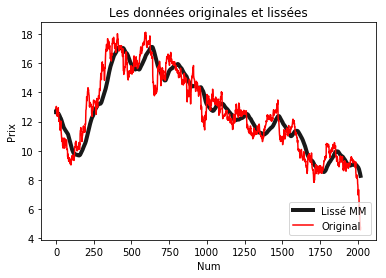

In [21]:
sup_graph("Num", "Moyenne_Mobile", "High")

Le même code mais avec les dates en abscisses:

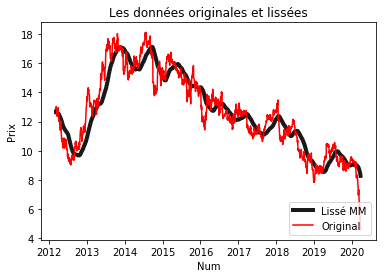

In [22]:
sup_graph("Date", "Moyenne_Mobile", "High")

On prendra ici les cotations entre 200 et 400.

In [23]:
#### Cotation entre 500 et 1000
Num_ford = ford[(ford["Num"] >= 500) & (ford["Num"]<=1000)]

In [24]:
###Create real world data
Num_ford_Real = ford[(ford["Num"] >= 0) & (ford["Num"]<500)]

In [25]:
#Num_ford = ford[(ford["Num"] >= 200) & (ford["Num"]<=400)]

In [26]:
Num_ford

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile
499,2014-03-11,15.520000,15.170000,15.490000,15.300000,34612800.0,11.336385,500,15.925000
500,2014-03-12,15.420000,15.150000,15.240000,15.400000,31250500.0,11.410478,501,15.907250
501,2014-03-13,15.460000,15.100000,15.460000,15.180000,34344100.0,11.247472,502,15.886500
502,2014-03-14,15.250000,15.060000,15.180000,15.080000,26943300.0,11.173376,503,15.862125
503,2014-03-17,15.330000,15.160000,15.180000,15.280000,26929100.0,11.321563,504,15.838500
504,2014-03-18,15.570000,15.280000,15.290000,15.490000,28324200.0,11.477160,505,15.817250
505,2014-03-19,15.550000,15.350000,15.510000,15.480000,24374300.0,11.469752,506,15.800000
506,2014-03-20,15.550000,15.370000,15.450000,15.550000,21203100.0,11.521619,507,15.780500
507,2014-03-21,15.740000,15.450000,15.730000,15.470000,31678500.0,11.462343,508,15.763125
508,2014-03-24,15.540000,15.300000,15.480000,15.390000,27033600.0,11.403069,509,15.742875


## Split train and test based on year

In [27]:
#test and train split based on date
ford['Date'] = pd.to_datetime(ford['Date'])
train=ford['Date'].dt.year<2019
test=ford['Date'].dt.year>2019

fordTrain=ford[train]
fordTest=ford[test]

In [28]:
fordTrain

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile
0,2012-03-14,12.90,12.63,12.64,12.88,47578500.0,9.088853,1,12.640000
1,2012-03-15,13.04,12.83,12.90,12.90,55286600.0,9.102968,2,12.770000
2,2012-03-16,12.90,12.51,12.86,12.51,77119600.0,8.827763,3,12.800000
3,2012-03-19,12.68,12.48,12.52,12.63,52445700.0,8.912439,4,12.730000
4,2012-03-20,12.61,12.39,12.48,12.54,40214400.0,8.848931,5,12.680000
5,2012-03-21,12.67,12.55,12.59,12.57,27521400.0,8.870101,6,12.665000
6,2012-03-22,12.54,12.24,12.48,12.32,50117100.0,8.693687,7,12.638571
7,2012-03-23,12.37,12.18,12.31,12.32,44755000.0,8.693687,8,12.597500
8,2012-03-26,12.50,12.39,12.45,12.48,26692200.0,8.806593,9,12.581111
9,2012-03-27,12.61,12.30,12.51,12.32,35070700.0,8.693687,10,12.574000


Dans cette partie, on cherchera à prédire notre moyenne mobile à l'aide d'une régression linéaire

## Linear Regression with custom dataset

In [53]:
#### Regression Linéaire

from sklearn.linear_model import LinearRegression

#### fit(X,y)

#### On cherche a predire une moyenne mobile

model = LinearRegression().fit(fordTrain[["Open"]], fordTrain[["Moyenne_Mobile"]])


m = model.coef_[0
               ]
b = model.intercept_

#### Equation de la ligne

print("y=", round(m[0], 2), "x +", round(b[0],2)) ##### Equation de la droite

y= 0.84 x + 2.17


<math>
Y = X \beta + \epsilon
</math>

In [58]:
#### Prédiction de la moyenne mobile du cours d'ouverture

prediction = model.predict(fordTest[["Moyenne_Mobile"]])
prediction[:10]

array([[9.77378297],
       [9.77620203],
       [9.77420368],
       [9.77252086],
       [9.76999661],
       [9.76936556],
       [9.76936556],
       [9.76926038],
       [9.76831379],
       [9.76978626]])

In [59]:
##### On crée un nouveau data frame avec les valeurs prédites
prediction = pd.DataFrame(data = prediction, index = fordTest.index.values, columns = ["Pred"])

prediction.head(5)  #### Affichage des 5 valeurs

,Pred
1963,9.773783
1964,9.776202
1965,9.774204
1966,9.772521
1967,9.769997


In [60]:
#### Jointure de la prediction avec l'ancienne table
jointure = ford.join(prediction, how = "inner") 
jointure.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile,Pred
1963,2020-01-02,9.42,9.19,9.29,9.42,43425700.0,9.262475,1964,9.039375,9.773783
1964,2020-01-03,9.37,9.15,9.31,9.21,45040800.0,9.055987,1965,9.042250,9.776202
1965,2020-01-06,9.17,9.06,9.10,9.16,43372300.0,9.006823,1966,9.039875,9.774204
1966,2020-01-07,9.25,9.12,9.20,9.25,44984100.0,9.095318,1967,9.037875,9.772521
1967,2020-01-08,9.30,9.17,9.23,9.25,45994900.0,9.095318,1968,9.034875,9.769997


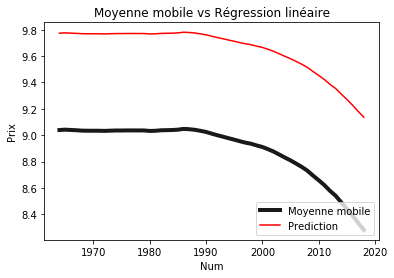

In [61]:
#### Affichage de la moyenne mobile et de la prédiction

fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [62]:
import sklearn

r_carre = sklearn.metrics.r2_score(jointure["Moyenne_Mobile"],jointure["Pred"], multioutput = "uniform_average")
r_carre

-12.298625339703943

In [35]:
### Check the performance of the Prediction
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, Num_ford[["Close"]],  model.predict(Num_ford[["Moyenne_Mobile"]]), cv=5)
print("scores = " + str(scores))

scores = [ 0.13829673 -2.95650598 -0.9398207   0.42220266 -6.99723207]


## Using multiple variable

In [36]:
from sklearn.model_selection import train_test_split
X = Num_ford[['Close','Open']]
y = Num_ford[['Moyenne_Mobile']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [37]:
from sklearn.linear_model import LinearRegression
# Create model
linreg = LinearRegression()
linreg.fit(X_train, y_train)
# Calculate our y hat (how our model performs against the test data held off)
y_hat_test = linreg.predict(X_test)
print(y_hat_test[:10])

[[15.24554106]
 [16.49777422]
 [15.31879128]
 [15.51883725]
 [15.87694964]
 [15.68496728]
 [15.48378704]
 [15.68123738]
 [15.26161747]
 [15.529194  ]]


In [52]:
b = linreg.coef_
b

array([[-0.3162327 ,  0.77609407]])

In [38]:
metrics=y_test-linreg.predict(X_test)
metrics

,Moyenne_Mobile
936,-0.894541
586,-0.192899
815,0.524334
908,-1.100462
756,-0.313450
542,-0.060342
809,0.443713
680,-0.019612
857,-0.068242
826,0.166056


In [39]:
prediction = pd.DataFrame(data = y_hat_test, index = X_test.index.values, columns = ["Pred"])

prediction.head(5) 
jointure = Num_ford.join(prediction, how = "inner") 
jointure.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile,Pred
980,2016-02-05,11.70,11.42,11.52,11.45,33322200.0,9.153015,981,13.858125,13.743785
982,2016-02-09,11.61,11.22,11.47,11.35,48956800.0,9.073074,983,13.771125,13.736604
983,2016-02-10,11.57,11.33,11.46,11.34,38160300.0,9.065081,984,13.724375,13.732005
987,2016-02-17,12.30,11.98,11.99,12.27,37766400.0,9.808512,988,13.534500,13.849238
990,2016-02-22,12.56,12.10,12.10,12.56,33549700.0,10.040338,991,13.406500,13.842901


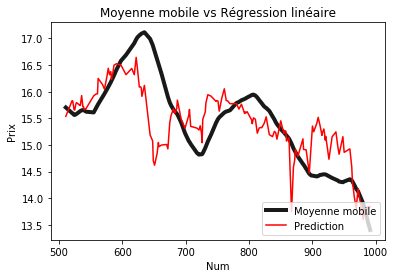

In [40]:
fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [41]:
import sklearn

r_carre = sklearn.metrics.r2_score(y_test,y_hat_test, multioutput = "uniform_average")
r_carre

0.4427995049213185

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
# See our Squared Mean Error score and Root Mean Squared Error:
test_mse = mean_squared_error(y_test, y_hat_test)
test_rmse = np.sqrt(test_mse)
print("Squared Mean Error:",test_rmse)
# See our Mean Absolute Error
test_mae = mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:",test_mae)


Squared Mean Error: 0.6203453849521994
Mean Absolute Error: 0.44820376079136215


In [43]:
cv_5_results = cross_val_score(linreg, X, y, cv=5)
print("5 fold cross validation score:",cv_5_results)

5 fold cross validation score: [ 0.20772396 -2.85173717 -0.85084805  0.44338012 -6.65620061]


## Test with real data/all data with multivariante model

In [44]:
#test with real data/all data
y_hat_test = linreg.predict(X)
print(y_hat_test[:10])

[[15.60738232]
 [15.38173571]
 [15.62204759]
 [15.43636485]
 [15.37311837]
 [15.39207957]
 [15.56598287]
 [15.49728041]
 [15.73988514]
 [15.57116021]]


In [45]:
prediction = pd.DataFrame(data = y_hat_test, index = X.index.values, columns = ["Pred"])

prediction.head(5) 
jointure = Num_ford.join(prediction, how = "inner") 
jointure.tail()

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile,Pred
995,2016-02-29,12.65,12.39,12.42,12.51,32999100.0,10.000366,996,13.249375,14.107063
996,2016-03-01,13.12,12.72,13.01,13.09,71523900.0,10.464012,997,13.227250,14.381544
997,2016-03-02,13.35,13.04,13.06,13.22,36598200.0,10.567935,998,13.205125,14.379238
998,2016-03-03,13.61,13.24,13.25,13.54,44524500.0,10.823739,999,13.187000,14.425501
999,2016-03-04,13.86,13.43,13.56,13.59,31818600.0,10.863708,1000,13.175125,14.650279


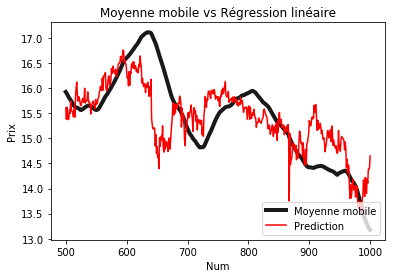

In [46]:
fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [47]:
r_carre = sklearn.metrics.r2_score(y,y_hat_test, multioutput = "uniform_average")
r_carre

0.4960371149985825

So our first model used a 'Close' as feature and fit against 'Moyenne_Mobile' is best andits  r^2 score 0.666224520203802